<a href="https://colab.research.google.com/github/PaulinaWalasiewicz/Colab-notebooks/blob/main/Matematyka_i_statystyka_Cw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


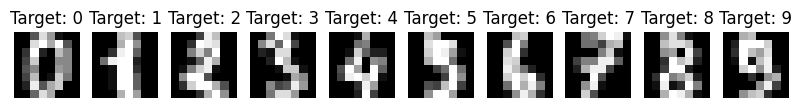

In [ ]:
digits = load_digits();
fig,axes=plt.subplots(1,10,figsize=(10,3))

for i in range(10):
  axes[i].imshow(digits.images[i], cmap='gray')
  axes[i].axis("off")
  axes[i].set_title(f'Target: {digits.target[i]}')
plt.show()

Podczas ćwiczenia student wykonuje następujące działania:
1. pisze na białym papierze wybraną przez siebie cyfrę, fotografuje ją i przesyła drogą mailową do komputera, na którym pracuje.
2. Otwiera aplikację Paint do przycięcia obrazu, aby zmaksymalizować cyfrę i usunąć zbędne tło.
3. Zapamiętaj ścieżkę dostępu do obrazu, ponieważ będzie potrzebna przy pobieraniu do kodu w Pythonie.
4. Student powinien rozpoznać możliwie najwięcej cyfr napisanych przez siebie. Być może okazać się potrzebne pogrubienie linii, aby cyfra była wystarczająco dobrze rozpoznawalna.
5. Zaleca się regulowanie kilkoma parametrami, które mogą mieć wpływ na skuteczność rozpoznawalności, w szczególności liczba sąsiadów k oraz % podziału danych na dane treningowe i testowe.


In [ ]:
# pobranie niezbędnych bibliotek oraz bazy danych z cyframi
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [ ]:
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

print(df.info())  # wypisanie podstawowych danych o bazie cyfr
print(df.describe())  # Statystyka opisowa o bazie cyfr



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

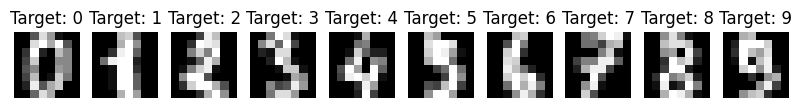

In [ ]:
# Podgląd map bitowych cyfr na ekranie
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Target: {digits.target[i]}')
plt.show()



In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path1 = '/content/drive/My Drive/Magisterka sem2/Matematyka i Statystyka/DaneZadaniaDomowe/cyfry1'
file_path2 = '/content/drive/My Drive/Magisterka sem2/Matematyka i Statystyka/DaneZadaniaDomowe/cyfry2'
file_path3 = '/content/drive/My Drive/Magisterka sem2/Matematyka i Statystyka/DaneZadaniaDomowe/cyfry3'
file_st = 'cyfra_#.jpg'

def print_numbers(file_path, file_st):
  fig, axes = plt.subplots(1, 10, figsize=(10, 3))
  for i in range(10):
      file = file_st.replace('#', str(i))
      image_path = (file_path + '/' + file)
      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      axes[i].imshow(image, cmap='gray')
      axes[i].axis('off')
      axes[i].set_title(f'Target: {i}')
  plt.show()

In [ ]:
def load_images(file_path, file_st):
  images=[]
  labels =[]
  for i in range(10):
    file = file_st.replace('#', str(i))
    image_path = (file_path + '/' + file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Załadowanie obrazu własnej cyfry xx.jpg (01, 02 itd., / … / ścieżka dostępu
    image_path = (file_path + '/' + file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Przetwórz obraz do 8x8 pikseli (aby zachować zgodność z danymi w bazie cyfr)
    resized_image = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA) # NEAREST
    # Odwróć kolory colory, jeśli tło obrazu jest białe a cyfra czarna)
    resized_image = 255 - resized_image

    # unormalizuj wartość piksela w skali (0 – 16)  pixel values to match the digits (0–16)
    normalized_image = (resized_image / resized_image.max()*16).astype(int)

    # wyświetlenie tablicy pikseli odczytanego obrazu
    # print(f" Cyfra {i} Tablica pikseli (po dopasowaniu wymiarów względem danych w bazie)")
    # print(normalized_image)

    images.append(resized_image)
    labels.append(i)
  fig, axes = plt.subplots(1, 10, figsize=(10, 3))
  for i in range(10):
      axes[i].imshow(images[i], cmap='gray')
      axes[i].axis('off')
      axes[i].set_title(f'Target: {labels[i]}')
  plt.show()
  return images, labels

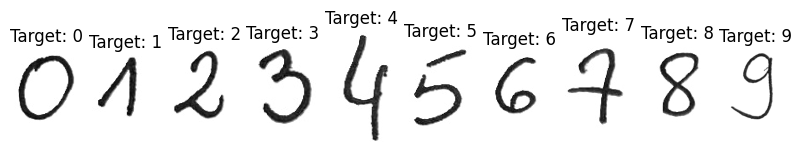

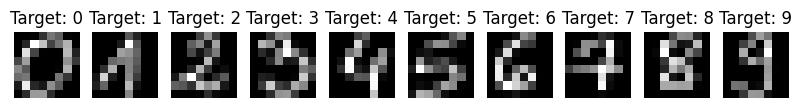

In [ ]:
# pliki z podejscia 1
print_numbers(file_path1, file_st)
images1,labels = load_images(file_path1, file_st)


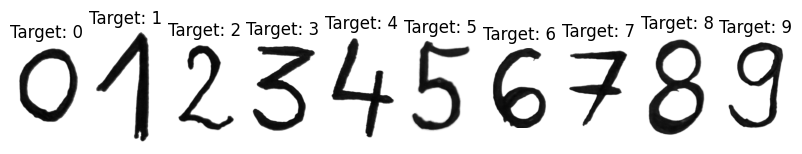

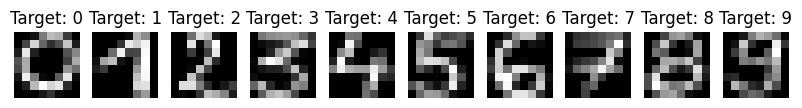

In [ ]:
# pliki z podejscia 2
print_numbers(file_path2, file_st)
images2,labels = load_images(file_path2, file_st)

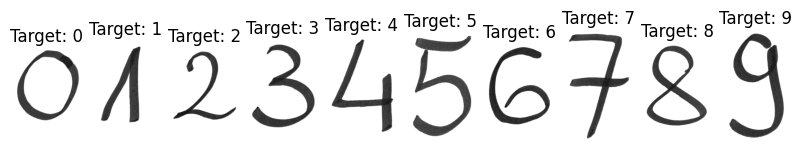

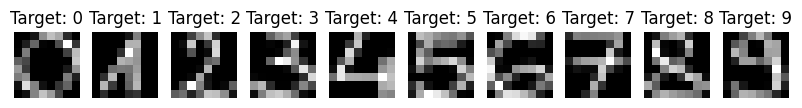

In [ ]:
# pliki z podejscia 3
print_numbers(file_path3, file_st)
images3,labels = load_images(file_path3, file_st)

In [ ]:
# # Załadowanie obrazu cyfr I ujawnienie parametrów opisujących cyfry
# digits = load_digits()
# print(digits.keys())
# print(digits.data[:5])
# print(digits.target[:])
# print(digits.DESCR)



In [ ]:
# # Podgląd obrazu
# plt.gray()  # skala szarości
# plt.matshow(digits.images[1])  # Podgląd pierwszego obrazu
# plt.show()



In [ ]:
# Przygotowanie modelu k-NN
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
def predict_image(images, labels):
  for i in range(len(images)):
    # Konwertowanie obrazu do formatu kompatybilnego z modelem
    input_image2 = images[i].flatten().reshape(1, -1)

    # Normalization of input values (to 0–16, as in dataset digits)
    input_image_normalized = (input_image2 / 16)

    # Przewidywana cyfra po odczytaniu i zastosowaniu klasyfikacji k-NN
    predicted_label = knn.predict(input_image_normalized)
    print(f"Cyfra {labels[i]} rozpoznana jako: {predicted_label[0]}")  # Poprawna wersja
    plt.imshow(images[i].reshape(8, 8), cmap='gray')
    plt.show()


Cyfra 0 rozpoznana jako: 0


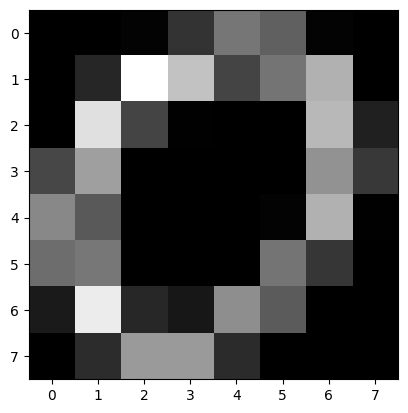

Cyfra 1 rozpoznana jako: 1


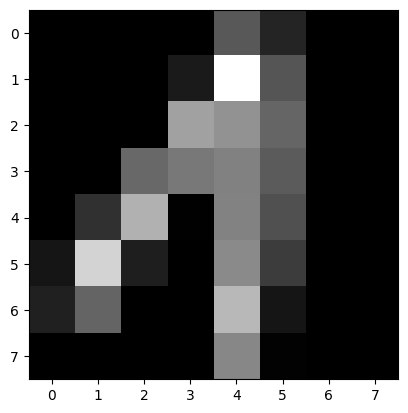

Cyfra 2 rozpoznana jako: 2


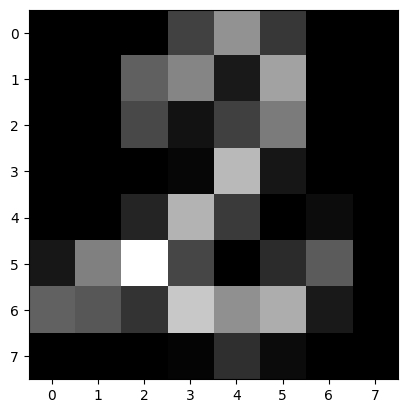

Cyfra 3 rozpoznana jako: 3


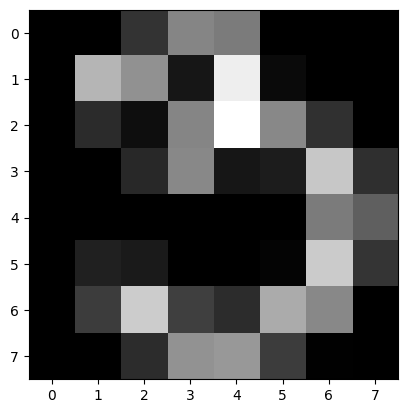

Cyfra 4 rozpoznana jako: 4


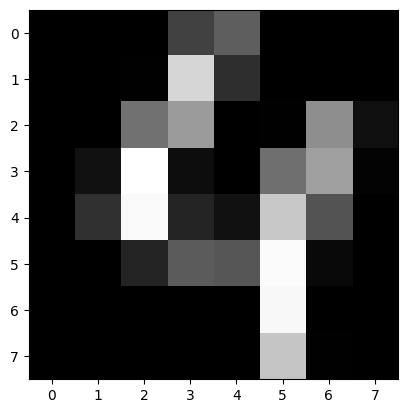

Cyfra 5 rozpoznana jako: 0


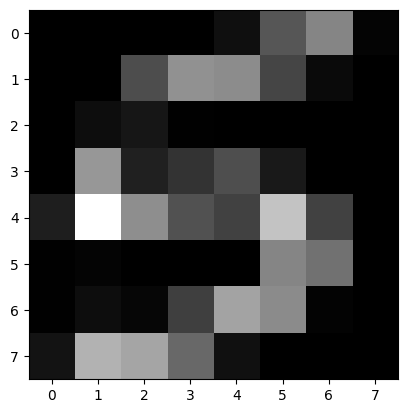

Cyfra 6 rozpoznana jako: 0


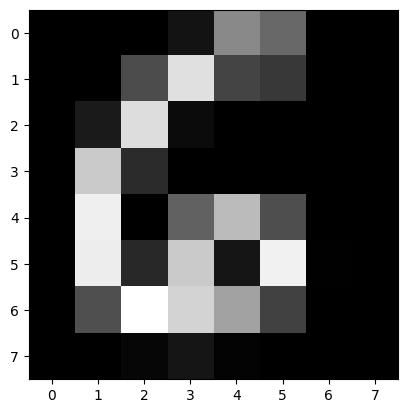

Cyfra 7 rozpoznana jako: 7


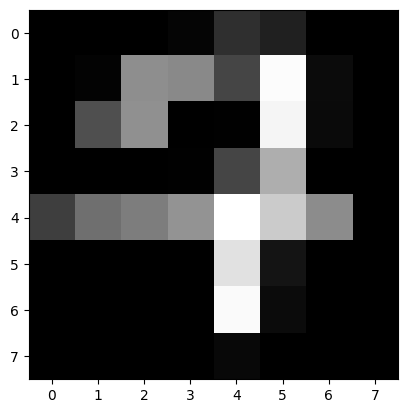

Cyfra 8 rozpoznana jako: 0


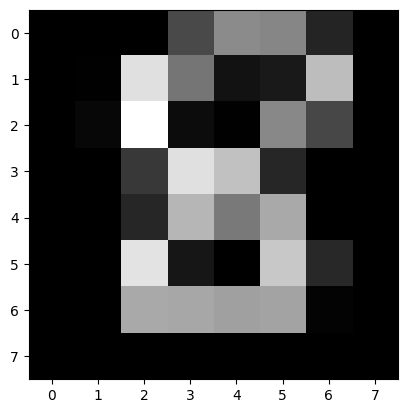

Cyfra 9 rozpoznana jako: 0


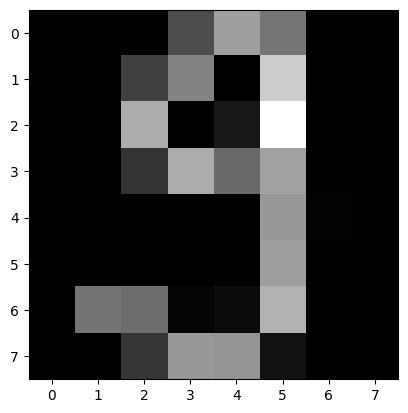

In [ ]:
predict_image(images1, labels)

Cyfra 0 rozpoznana jako: 0


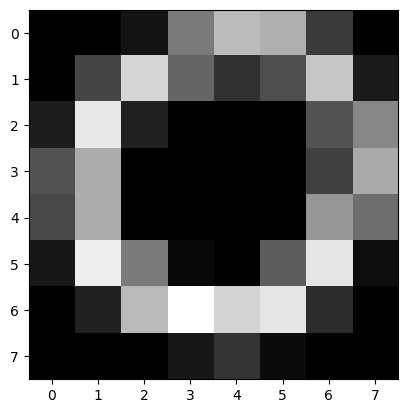

Cyfra 1 rozpoznana jako: 1


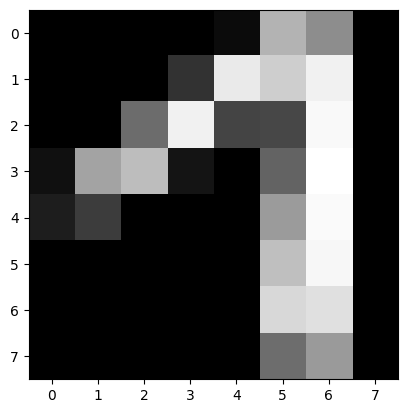

Cyfra 2 rozpoznana jako: 2


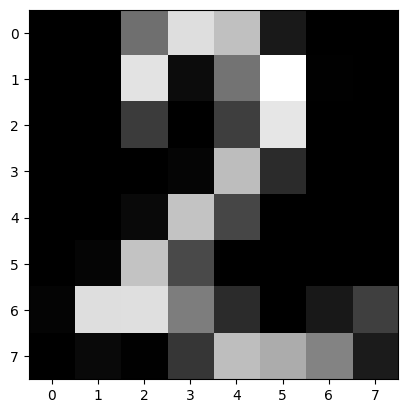

Cyfra 3 rozpoznana jako: 5


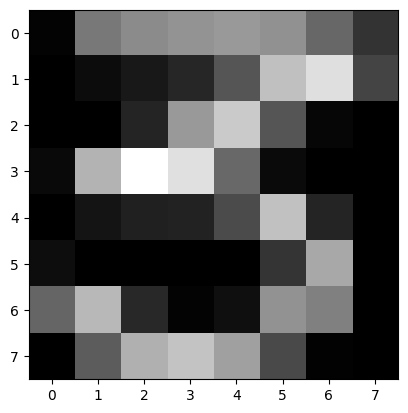

Cyfra 4 rozpoznana jako: 0


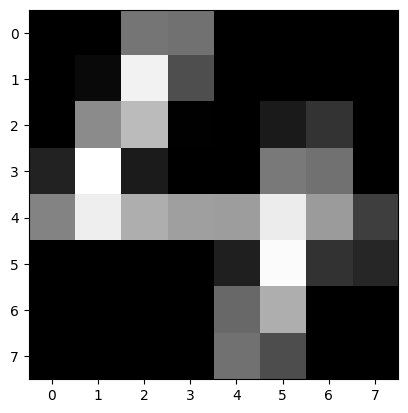

Cyfra 5 rozpoznana jako: 5


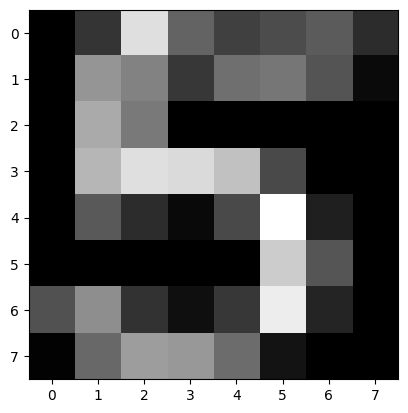

Cyfra 6 rozpoznana jako: 6


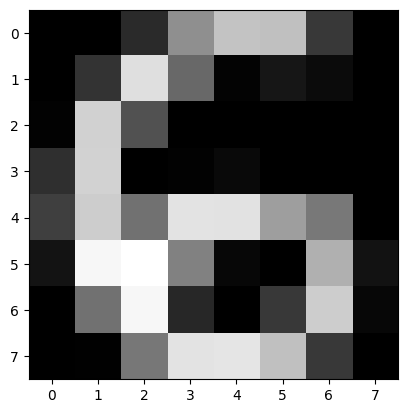

Cyfra 7 rozpoznana jako: 7


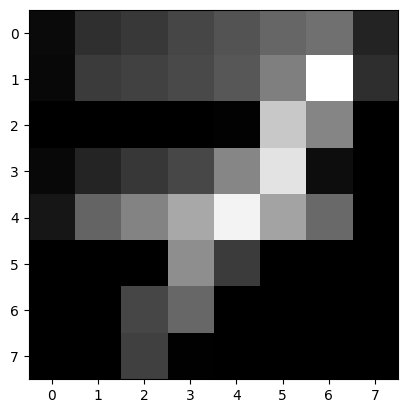

Cyfra 8 rozpoznana jako: 5


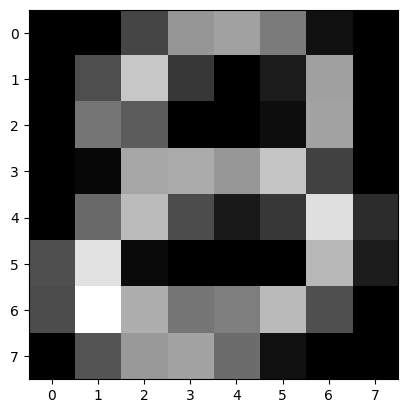

Cyfra 9 rozpoznana jako: 9


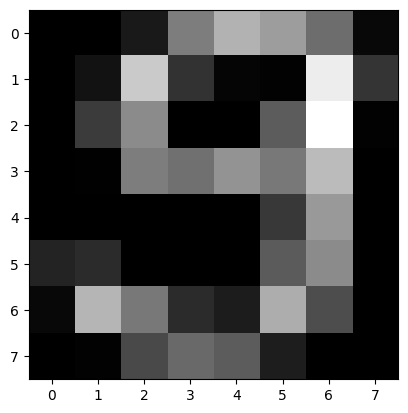

In [ ]:
predict_image(images2, labels)


Cyfra 0 rozpoznana jako: 0


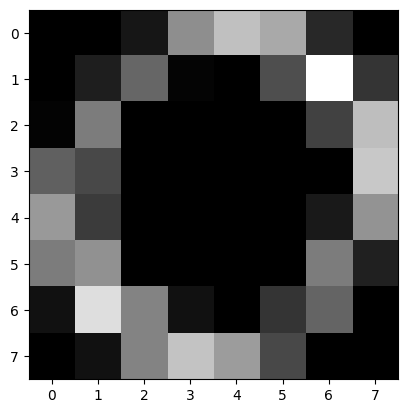

Cyfra 1 rozpoznana jako: 1


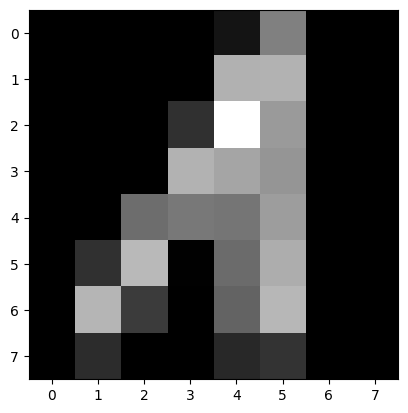

Cyfra 2 rozpoznana jako: 0


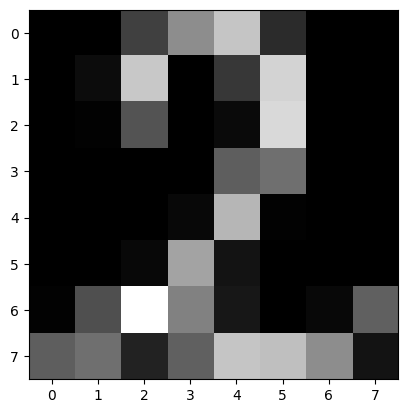

Cyfra 3 rozpoznana jako: 9


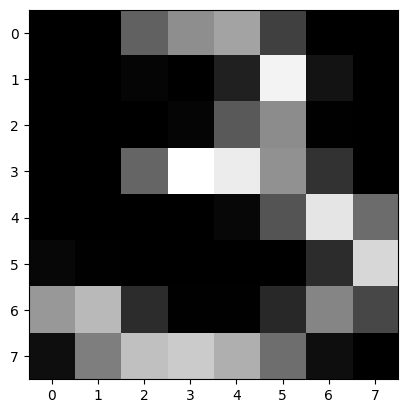

Cyfra 4 rozpoznana jako: 6


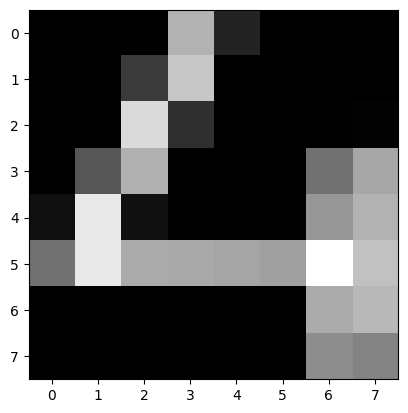

Cyfra 5 rozpoznana jako: 5


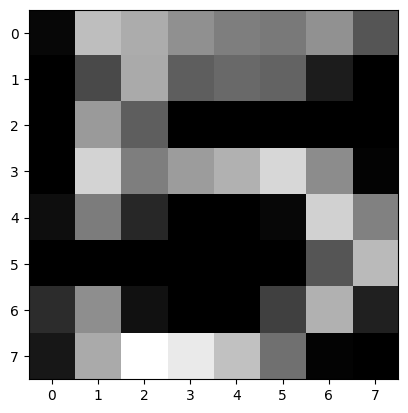

Cyfra 6 rozpoznana jako: 0


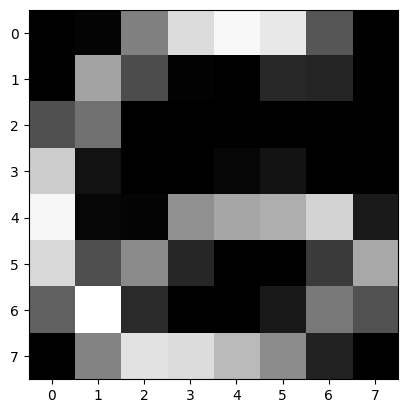

Cyfra 7 rozpoznana jako: 7


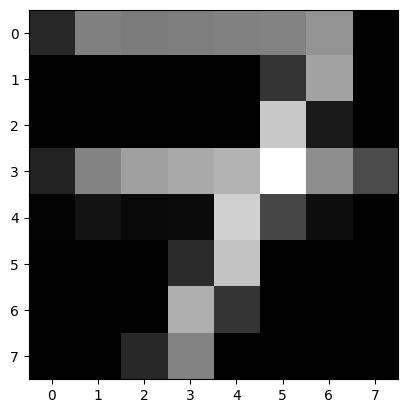

Cyfra 8 rozpoznana jako: 8


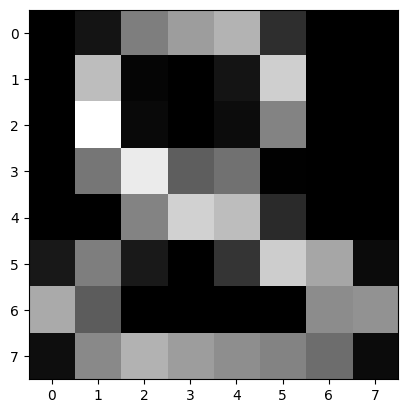

Cyfra 9 rozpoznana jako: 9


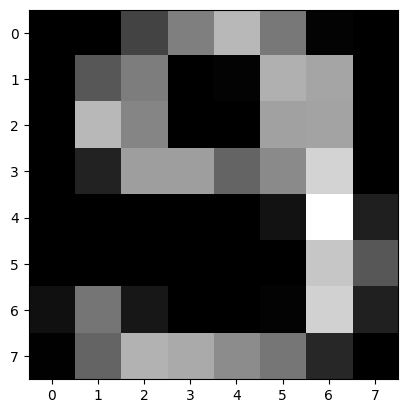

In [ ]:
predict_image(images3, labels)